# Preamble
Run once

In [27]:
import orca_parser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.interpolate import griddata

## Functions

In [ ]:
#Given a matrix where each row is the xyz coordinates of each atom, calculates the distance between two atoms.
def calcDistance(matrix,i,j):
    v1 = np.array(matrix[i])
    v2 = np.array(matrix[j])
    d = np.sqrt(np.sum((v1-v2)**2))
    return d

def calcAngle(matrix,i,j,k):
    v1 = np.array(matrix[i])
    v2 = np.array(matrix[j])
    v3 = np.array(matrix[k])
    w1 = v1-v2 
    w2 = v3-v2
    product = np.inner(w1,w2)
    theta = np.arccos(product/(np.linalg.vector_norm(w1)*np.linalg.vector_norm(w2)))*180/np.pi
    return theta

#Returns an array of coordinates and an array of energies (if there are many configurations)
def dataExtractor(filename):
    output = orca_parser.ORCAParse(filename)
    print("ORCA exited normally:", output.valid)

    #Returns xyz coordinates as arrays. Array i = atom i.
    #If there are many geometries, it returns an array os arrays, each sub-array containing a 3 element array corresponding to xyz coordinates of the i-th atom.
    output.parse_coords()
    #Returns the energies. 
    #If there are many geometries, it returns an array with each geometry.
    output.parse_energies()

    return output.coords, output.energies

#Only works for a 3 atoms system.
#Returns distance of two atoms to the central atom, and the angle in a table.
def createDataTable(filename):
    coords, energies = dataExtractor(filename)
    
    d1 = [calcDistance(m, 0, 1) for m in coords]
    d2 = [calcDistance(m, 1, 2) for m in coords]
    angle = [calcAngle(m,0,1,2) for m in coords]

    #Set the minimum to zero and convert Hartrees to eV
    energies = (np.array(energies) - min(energies))*27.211407953

    data = pd.DataFrame({
        'd1' : d1,
        'd2' : d2, 
        'angle' : angle,
        'energy' : energies
    })

    return data

def make_transparent_colormap(cmap_name, transparent_start=0.7, transparent_power=1.0):
    """
    Create a colormap that becomes transparent at the end
    
    Parameters:
    - cmap_name: name of the base colormap
    - transparent_start: where transparency starts (0-1)
    - transparent_power: controls the fade curve (1=linear, 2=quadratic, etc.)
    """
    base_cmap = plt.get_cmap(cmap_name)
    colors = base_cmap(np.linspace(0, 1, 256))
    
    start_idx = int(len(colors) * transparent_start)
    
    for i in range(start_idx, len(colors)):
        # Calculate transparency with power curve
        progress = (i - start_idx) / (len(colors) - start_idx)
        alpha = 1.0 - progress ** transparent_power
        colors[i, 3] = alpha
    
    return ListedColormap(colors)


def myContourPlot(x,y,z,levels, figName, figSize = (8,6),polar = False):
    #Create the colormap
    tranparent_hot = make_transparent_colormap('hot', 0.8, 1)

    #Create the grid:
    gridX = np.linspace(min(x), max(x), 100)
    gridY = np.linspace(min(y), max(y), 100)

    X, Y = np.meshgrid(gridX, gridY)
    Z_interp = griddata((x,y),z, (X,Y), method = 'cubic')

    # --- 3. Generate Contour Plot ---
    if not polar:
        fig, ax = plt.subplots(figsize=figSize)
    if polar:
        fig, ax = plt.subplots(figsize=figSize, subplot_kw={'projection':'polar'})

    # Use contourf (filled contour plot)
    contour = ax.contourf(
        X,
        Y,
        Z_interp,
        cmap=tranparent_hot,
        levels=levels,
        extend='max'
    )
    
    # Make figure and axes background transparent
    fig.patch.set_alpha(0.0)
    ax.set_facecolor('none')

    #Make colorbar
    cbar = fig.colorbar(contour)

    plotColor = 'white'

    # Colorbar label and text color
    cbar.set_label('Energías (eV)', fontsize=22, color=plotColor)

    # Make colorbar background transparent
    cbar.ax.set_facecolor('none')

    # Set colorbar tick colors to white
    cbar.ax.tick_params(colors=plotColor)  # This sets both ticks and tick labels to white

    # Optional: Customize colorbar tick label properties
    cbar.ax.tick_params(axis='y', colors=plotColor, labelsize=14)  # Specific to colorbar axis

    # Set spine (axis line) colors to white if you want them visible
    if not polar:
        ax.spines['bottom'].set_color(plotColor)
        ax.spines['top'].set_color(plotColor) 
        ax.spines['right'].set_color(plotColor)
        ax.spines['left'].set_color(plotColor)
    
    if polar:
        ax.patch.set_edgecolor(plotColor)

    ax.set_xlabel('$R_1 (\\AA)$', fontsize=22, color=plotColor)
    ax.set_ylabel('$R_2 (\\AA)$', fontsize=22, color=plotColor)

    # Set tick colors to white
    ax.tick_params(axis='x', colors=plotColor)
    ax.tick_params(axis='y', colors=plotColor)

    # Since the data is discrete, set limits to show the grid clearly
    ax.grid(True, linestyle='--', alpha=0.6, color=plotColor)

    plt.savefig(figName, transparent=True, facecolor='none', edgecolor='none')
    plt.show()

#Gets a list with displacement corresponding to normal modes [dx1, dy1, dz1, dx2, dy2, dz2, ..., dxi,dyi,dzi]
#Returns an array where each element represents the displacement of one atom: [[dx1,dy1,dz1], [dx2,dy2,dz2], ... [dxi,dyi,dzi]]
def modeExtractor(modes):
    

In [26]:
tranparent_hot = make_transparent_colormap('hot', 0.8, 1)

# H3

ORCA exited normally: True
       d1    d2  angle    energy
0     0.5  0.50  180.0  7.739929
1     0.5  0.55  180.0  6.530273
2     0.5  0.60  180.0  5.629952
3     0.5  0.65  180.0  4.948274
4     0.5  0.70  180.0  4.423484
...   ...   ...    ...       ...
1066  1.5  2.80  180.0  3.067091
1067  1.5  2.85  180.0  3.069076
1068  1.5  2.90  180.0  3.071893
1069  1.5  2.95  180.0  3.073812
1070  1.5  3.00  180.0  3.075417

[1071 rows x 4 columns]


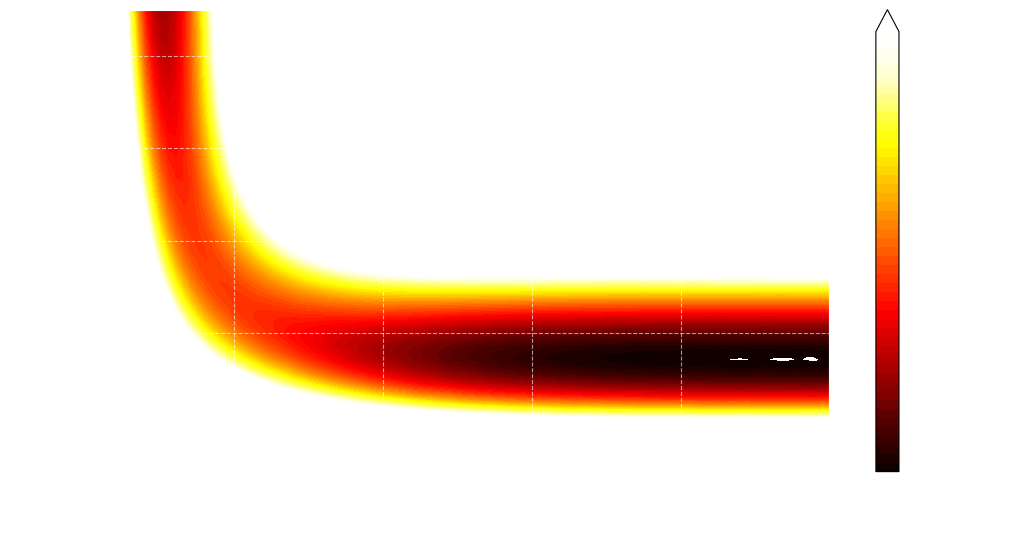

In [48]:
data = createDataTable('./H3/PES_asoc/PES_H3.out')
print(data)
levels = np.linspace(0,0.4,50)
myContourPlot(data.d2.values, data.d1.values, data.energy.values, levels=levels, figSize=(12,6), figName='H3_PES')


ORCA exited normally: True
      d1        d2  angle    energy
0    0.5  0.500000  180.0  7.660820
1    0.5  0.657895  180.0  4.777023
2    0.5  0.815789  180.0  3.518639
3    0.5  0.973684  180.0  2.879194
4    0.5  1.131579  180.0  2.513091
..   ...       ...    ...       ...
395  3.5  2.868421  180.0  4.635982
396  3.5  3.026316  180.0  4.651117
397  3.5  3.184211  180.0  4.661324
398  3.5  3.342105  180.0  4.668435
399  3.5  3.500000  180.0  4.673373

[400 rows x 4 columns]


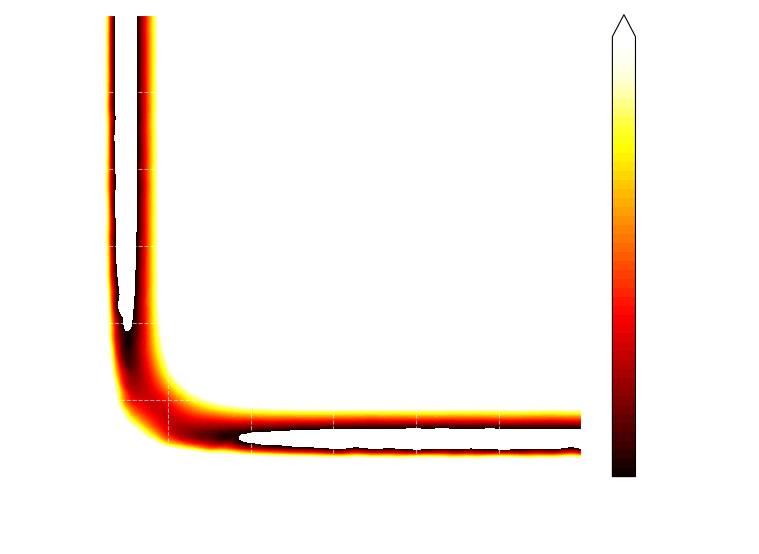

In [59]:
data = createDataTable('./H3/PES/PES_H3.out')
print(data)
levels = np.linspace(0,0.4,50)
myContourPlot(data.d2.values, data.d1.values, data.energy.values, levels=levels, figName='H3_PES')

# O3

ORCA exited normally: True
      d1        d2       angle     energy
0    0.9  0.900000  118.357675  19.613984
1    0.9  1.003448  118.357674  13.118608
2    0.9  1.106897  118.357648   9.956771
3    0.9  1.210344  118.357649   8.478271
4    0.9  1.313794  118.357668   7.854224
..   ...       ...         ...        ...
895  3.9  3.486207  118.357666  14.203479
896  3.9  3.589655  118.357658  14.209438
897  3.9  3.693103  118.357659  14.211026
898  3.9  3.796552  118.357651  14.211075
899  3.9  3.900000  118.357665  14.212900

[900 rows x 4 columns]


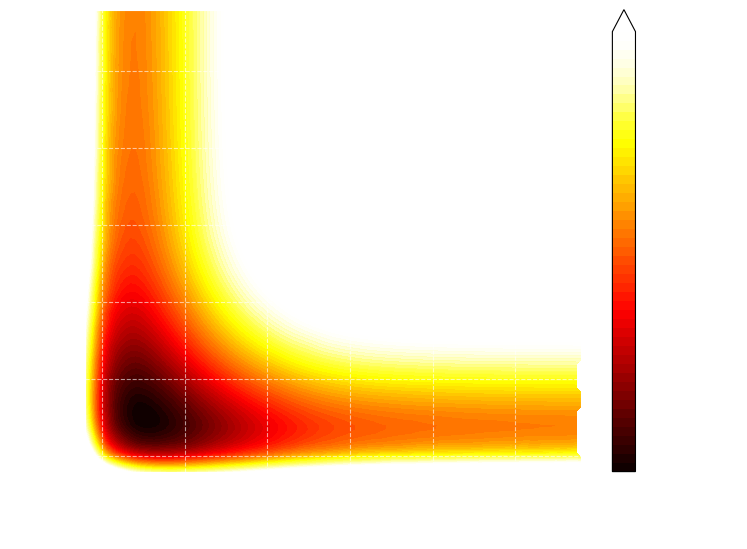

In [64]:
data = createDataTable('./O3/PES_O3/PES_O3.out')
print(data)
levels = np.linspace(-0.1,9,50)
myContourPlot(data.d2.values, data.d1.values, data.energy.values, levels=levels, figName='H3_PES')